In [9]:
import pandas as pd
from sklearn import datasets
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn import svm
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
import numpy as np

In [3]:
df=pd.read_csv("real_estate_upd_unf.csv", sep=",")\
[['build_type','object_type','gebruiksdoel','build_year',\
  'monument','greenroofs','woz_waarde','aantal_zonnepanelen','solar',\
  'slope_roof','soort_groendak']]

C:\Users\JdeJong\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (4,33,34,40,44,50,52,53,54,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,74,75,76,79,82,85,88,89,91) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [42]:
# Choosing the columns and number of random elements
elements=['solar','gebruiksdoel','build_type','woz_waarde','build_year','slope_roof','monument','greenroofs']
elements2=['build_type','woz_waarde','gebruiksdoel','build_year']
n=100000

# Cleaning

In [43]:
df_ml=df[elements]
df_ml=df_ml.fillna(value={'solar':False})
df_ml=df_ml.fillna(value={'greenroofs':False})
df_ml=df_ml.dropna(subset=['woz_waarde'])
df_ml=df_ml.dropna(subset=['build_type'])
df_ml=df_ml.dropna(subset=['gebruiksdoel'])
df_ml=df_ml.dropna(subset=['build_year'])
df_ml = df_ml[df.build_year != 0]
df_ml = df_ml[df.monument != 1]
df_ml = df_ml[df.slope_roof == 0]
df_ml['woz_waarde']=np.log(df_ml['woz_waarde'])


df_ml=df_ml.sample(n=n, replace=True, random_state=1)
df_ml['solar']=df_ml['solar'].replace({'JA': True, False: False})

solar_gr=[]
for i in zip(df_ml.solar, df_ml.greenroofs):
    if i[0]+i[1]==0:
        solar_gr.append(False)
    else:
        solar_gr.append(True)
df_ml['solar_gr']=solar_gr

le=preprocessing.LabelEncoder()
le.fit(df_ml['gebruiksdoel'])
df_ml['gebruiksdoel']=le.transform(df_ml['gebruiksdoel'])

le2=preprocessing.LabelEncoder()
le2.fit(df_ml['build_type'])
df_ml['build_type']=le2.transform(df_ml['build_type'])

C:\Users\JdeJong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\JdeJong\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
C:\Users\JdeJong\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


# Sorting data and splitting

In [32]:
# Sorting the data which makes it convenient for splitting
df_ml=df_ml.sort_values(by=['solar_gr'])
T=df_ml[-sum(df_ml.solar_gr[df_ml.solar_gr==True]):len(df_ml)]
F=df_ml[0:-sum(df_ml.solar_gr[df_ml.solar_gr==True])]

# TSNE

In [ ]:
# Defining Model
model = TSNE(learning_rate=100)

# Fitting Model
transformed = model.fit_transform(df_ml[elements2])

# Plotting 2d t-Sne
x_axis = transformed[:, 0]
y_axis = transformed[:, 1]

plt.scatter(x_axis[0:len(F)], y_axis[0:len(F)], c='red', edgecolor='none')
plt.scatter(x_axis[-len(T):Tot], y_axis[-len(T):Tot], c='green', edgecolor='none')

plt.show()

# gebruiksdoel/build_type

In [ ]:
for i in ([1,'s','red',df_ml[df_ml.greenroofs != True]], [0.8,'x','green',df_ml[df_ml.greenroofs == True]]):
    plt.scatter(i[3]['gebruiksdoel'], i[3]['build_type'], s=10, alpha=i[0], marker=i[1], c=i[2])
plt.xticks(df_ml['gebruiksdoel'],list(le.inverse_transform(df_ml['gebruiksdoel'])), rotation=90)
plt.yticks(df_ml['build_type'],list(le2.inverse_transform(df_ml['build_type'])))
plt.legend(['Onbekend', 'Greenroof'])
plt.show()

# woz_waarde/build_type

In [ ]:
for i in ([1,'s','red',df_ml[df_ml.greenroofs != True]], [0.8,'x','green',df_ml[df_ml.greenroofs == True]]):
    plt.scatter(i[3]['woz_waarde'], i[3]['build_type'], s=10, alpha=i[0], marker=i[1], c=i[2])
plt.yticks(df_ml['build_type'],list(le2.inverse_transform(df_ml['build_type'])))
plt.legend(['Onbekend', 'Greenroof'])
plt.show()

# build_year/build_type

In [ ]:
for i in ([1,'s','red',df_ml[df_ml.greenroofs != True]], [0.8,'x','green',df_ml[df_ml.greenroofs == True]]):
    plt.scatter(i[3]['build_year'], i[3]['build_type'], s=10, alpha=i[0], marker=i[1], c=i[2])
plt.yticks(df_ml['build_type'],list(le2.inverse_transform(df_ml['build_type'])))
plt.legend(['Onbekend', 'Greenroof'])
plt.show()

# Histograms

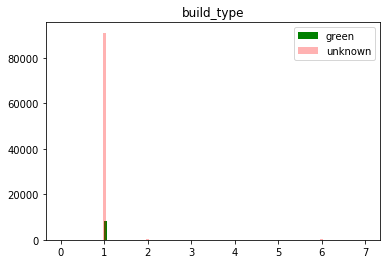

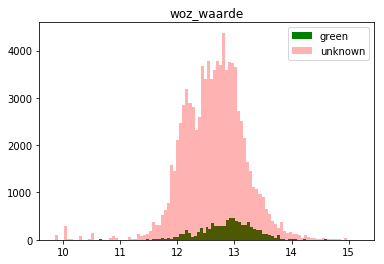

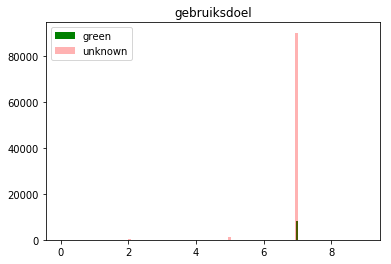

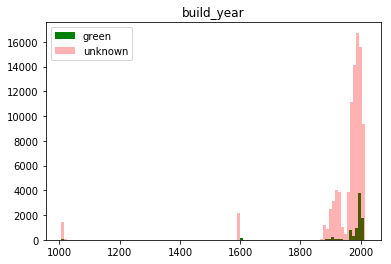

In [44]:
for i in elements2:
    fig = plt.figure()
    ax = fig.add_subplot(111)
    _ = ax.hist(T[i].values, color='green', bins=100)
    _ = ax.hist(F[i].values, color='red', alpha=.3, bins=100)
    plt.legend(['green','unknown'])
    plt.title(i)
#     if i=='gebruiksdoel' or i=='build_type':
#         plt.xticks(df_ml[i],list(le.inverse_transform(df_ml[i])), rotation=90)


# PCA

In [ ]:
pca= PCA(n_components=2)

scaler = StandardScaler()
rescaledX = scaler.fit_transform(df_ml[['build_type','gebruiksdoel','woz_waarde']])
pca.fit_transform(rescaledX)

C:\Users\JdeJong\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\JdeJong\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int32, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


Text(0, 0.5, 'component 2')

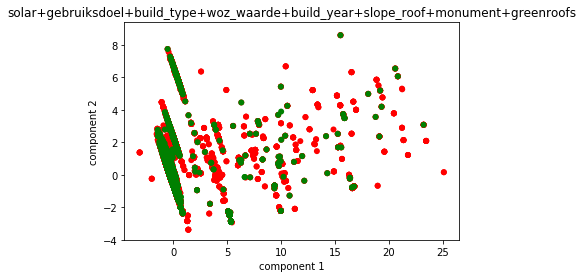

In [45]:
title=elements[0]
for i in elements[1:]:
    title+='+'+i
    
pca= PCA(n_components=2)

pipeline = Pipeline([('scaling', StandardScaler()), ('pca', pca)])



projected=pipeline.fit_transform(df_ml[elements2])
Tot=len(T)+len(F)
plt.scatter(projected[:, 0][0:len(F)], projected[:, 1][0:len(F)], c='red', edgecolor='none')
plt.scatter(projected[:, 0][-len(T):Tot], projected[:,1][-len(T):Tot], c='green', edgecolor='none')
plt.title(title)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [46]:
X=df_ml
kmeans = KMeans(n_clusters=3, algorithm='auto').fit(projected)
df_ml['kmeans']=kmeans.labels_

Text(0, 0.5, 'component 2')

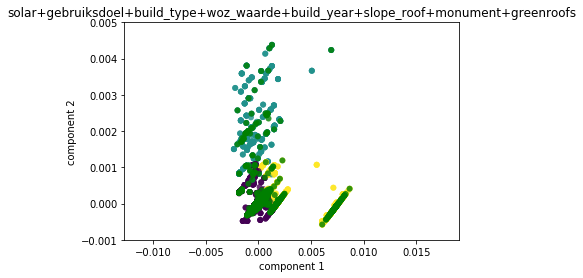

In [50]:
title=elements[0]
for i in elements[1:]:
    title+='+'+i
    
pca= PCA(n_components=2)

pipeline = Pipeline([('scaling', Normalizer()), ('pca', pca)])



projected=pipeline.fit_transform(df_ml[elements2])
Tot=len(T)+len(F)
plt.scatter(projected[:, 0][0:len(F)], projected[:, 1][0:len(F)], alpha=0.8, c=df_ml.kmeans[0:len(F)], edgecolor='none')
plt.scatter(projected[:, 0][-len(T):Tot], projected[:,1][-len(T):Tot], alpha=0.8, c='green', edgecolor='none')
plt.title(title)
plt.ylim(-0.001,0.005)
plt.xlabel('component 1')
plt.ylabel('component 2')

In [51]:
sums=np.array([sum(df_ml[df_ml['kmeans']==2]['solar_gr']),sum(df_ml[df_ml['kmeans']==1]['solar_gr']),sum(df_ml[df_ml['kmeans']==0]['solar_gr'])])

In [52]:
lengths=np.array([len(df_ml[df_ml['kmeans']==2]['solar_gr']),len(df_ml[df_ml['kmeans']==1]['solar_gr']),len(df_ml[df_ml['kmeans']==0]['solar_gr'])])

In [53]:
sums/lengths

array([0.04880295, 0.05022157, 0.08492167])

In [54]:
sums

array([ 159,   34, 8158])

In [55]:
lengths

array([ 3258,   677, 96065])